In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C2_train.gender_submission.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df=df.drop('Cabin',axis=1)

In [5]:
df=df.dropna()

In [6]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [8]:
df["Survived"].value_counts()

0    424
1    288
Name: Survived, dtype: int64

In [10]:
df1=df[['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare']]

In [11]:
x=df1.drop("Survived",axis=1)
y=df1["Survived"]

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70)

In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [23]:
parameters={'max_depth':[1,2,3,4,5],
            'min_samples_leaf':[5,10,15,20,25],
            'n_estimators':[10,20,30,40,50]}

In [24]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring="accuracy")
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [5, 10, 15, 20, 25],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [25]:
grid_search.best_score_

0.7329317269076305

In [26]:
parameters=dff

In [27]:
rfc_best=grid_search.best_estimator_

[Text(1927.6363636363637, 1993.2, 'Fare <= 15.646\ngini = 0.482\nsamples = 330\nvalue = [296, 202]\nclass = Yes'),
 Text(473.4545454545455, 1630.8000000000002, 'Age <= 13.75\ngini = 0.347\nsamples = 162\nvalue = [188, 54]\nclass = Yes'),
 Text(338.1818181818182, 1268.4, 'gini = 0.245\nsamples = 5\nvalue = [1, 6]\nclass = No'),
 Text(608.7272727272727, 1268.4, 'PassengerId <= 93.0\ngini = 0.325\nsamples = 157\nvalue = [187, 48]\nclass = Yes'),
 Text(270.54545454545456, 906.0, 'Age <= 25.5\ngini = 0.492\nsamples = 10\nvalue = [9, 7]\nclass = Yes'),
 Text(135.27272727272728, 543.5999999999999, 'gini = 0.219\nsamples = 5\nvalue = [7, 1]\nclass = Yes'),
 Text(405.81818181818187, 543.5999999999999, 'gini = 0.375\nsamples = 5\nvalue = [2, 6]\nclass = No'),
 Text(946.909090909091, 906.0, 'Fare <= 10.481\ngini = 0.304\nsamples = 147\nvalue = [178, 41]\nclass = Yes'),
 Text(676.3636363636364, 543.5999999999999, 'Age <= 18.5\ngini = 0.246\nsamples = 95\nvalue = [119, 20]\nclass = Yes'),
 Text(541

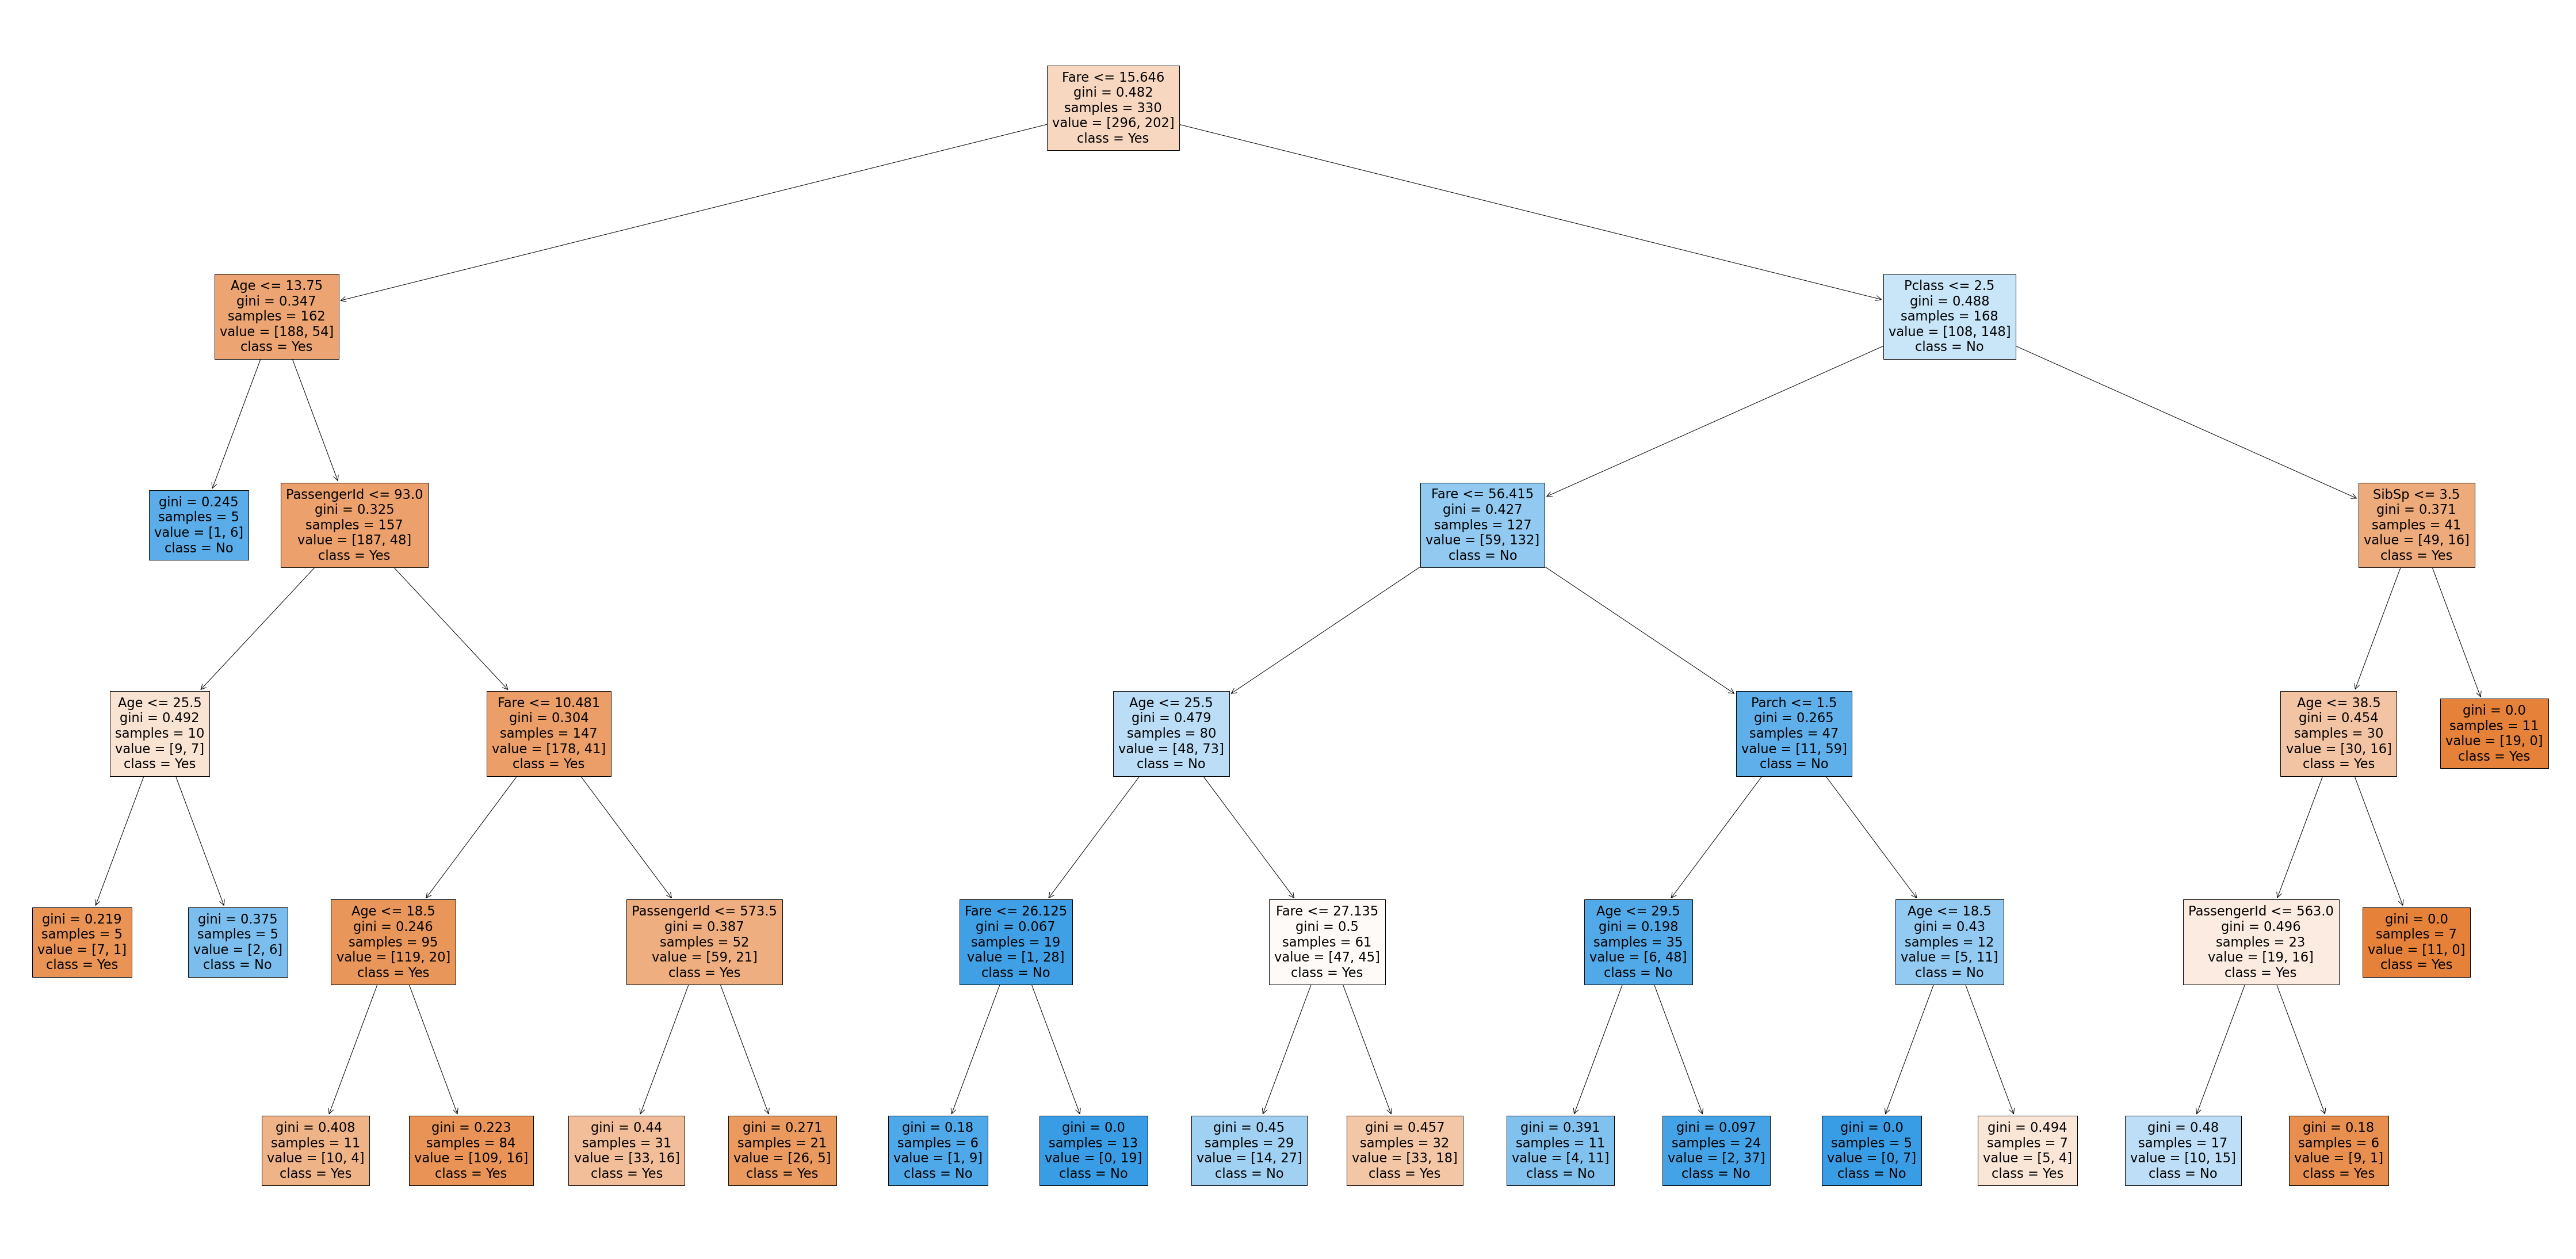

In [28]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rfc_best.estimators_[5],feature_names=x.columns,class_names=['Yes','No'],filled=True)